<h2>Random Forest</h2>
<a href="https://colab.research.google.com/github/thedhruvish/ml-algorithms-project/blob/main/random-forest/project-bank-full.ipynb">
<img src="https://raw.githubusercontent.com/thedhruvish/dataset-machine-learning/refs/heads/main/public/colab.svg" alt="colab svg"></a>
<h3>Bank Dataset </h3>

In [380]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [381]:
df = pd.read_csv('https://raw.githubusercontent.com/thedhruvish/dataset-machine-learning/refs/heads/main/ml-algorithms-project/bank-full.csv',sep=';',na_values='unknown')

In [382]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [383]:
df.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [384]:
col = ['job', 'marital', 'education', 'default', 'housing', 'loan']
df  = df[~(df[col].isnull().sum(axis=1) >= 4)]

In [385]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [386]:
df[col].isnull().sum(axis=1)

0        0
1        1
2        0
3        0
4        0
        ..
41183    0
41184    0
41185    0
41186    0
41187    0
Length: 41166, dtype: int64

In [387]:
for i in df.columns:
  if df[i].dtype == 'O':
    print(f'\n\n----------------------{i}-----------------------------------------')
    print(df[i].value_counts())



----------------------job-----------------------------------------
job
admin.           10420
blue-collar       9244
technician        6741
services          3967
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: count, dtype: int64


----------------------marital-----------------------------------------
marital
married     24914
single      11565
divorced     4609
Name: count, dtype: int64


----------------------education-----------------------------------------
education
university.degree      12167
high.school             9515
basic.9y                6044
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: count, dtype: int64


----------------------default-----------------------------------------
default
no     32588
yes        3
Name: count, dtype: int64


----------------------housing---------

In [388]:
df.isnull().sum()

age                  0
job                324
marital             78
education         1711
default           8575
housing            970
loan               970
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [389]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [390]:
df = df.drop(columns=['default'])

In [391]:
df['job'].value_counts()

job
admin.           10420
blue-collar       9244
technician        6741
services          3967
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: count, dtype: int64

In [392]:
df.isnull().sum()

age                  0
job                324
marital             78
education         1711
housing            970
loan               970
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [393]:
df['marital'].describe()

count       41088
unique          3
top       married
freq        24914
Name: marital, dtype: object

In [394]:
loan_yes =df['loan']=='yes'

In [395]:
df.loc[(df['marital'].isnull() & loan_yes ),['marital']] = 'yes'

In [396]:
df.loc[(df['marital'].isnull() & ~loan_yes ),['marital']] = 'no'

In [397]:
df.isnull().sum()

age                  0
job                324
marital              0
education         1711
housing            970
loan               970
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [398]:
marital_yes = df['marital'] == 'married'
marital_no = df['marital'] == 'single'
df.loc[(df['loan'].isnull() & marital_yes ),['loan']] = "yes"
df.loc[(df['loan'].isnull() & marital_no ),['loan']] = "no"

In [399]:
df.isnull().sum()

age                  0
job                324
marital              0
education         1711
housing            970
loan               119
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [400]:
df['housing'].mode()

0    yes
Name: housing, dtype: object

In [401]:
from sklearn.impute import SimpleImputer
imputer  = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [402]:
imputed_data  = imputer.fit_transform(df)

In [403]:
imputed_data

array([[56, 'housemaid', 'married', ..., 4.857, 5191.0, 'no'],
       [57, 'services', 'married', ..., 4.857, 5191.0, 'no'],
       [37, 'services', 'married', ..., 4.857, 5191.0, 'no'],
       ...,
       [56, 'retired', 'married', ..., 1.028, 4963.6, 'no'],
       [44, 'technician', 'married', ..., 1.028, 4963.6, 'yes'],
       [74, 'retired', 'married', ..., 1.028, 4963.6, 'no']],
      shape=(41166, 20), dtype=object)

In [404]:
df = pd.DataFrame(imputed_data,columns=df.columns)

In [405]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [406]:
df

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41161,73,retired,married,professional.course,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41162,46,blue-collar,married,professional.course,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41163,56,retired,married,university.degree,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41164,44,technician,married,professional.course,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [407]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [408]:
cat_col = ['job','marital','education','housing','loan','contact','month','day_of_week','poutcome','y']
for i in cat_col:
  le = LabelEncoder()
  df[i] = le.fit_transform(df[i].values)

In [409]:
df

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,1,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,1,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41161,73,5,1,5,1,0,0,7,0,334,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41162,46,1,1,5,0,0,0,7,0,383,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41163,56,5,1,6,1,0,0,7,0,189,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41164,44,9,1,5,0,0,0,7,0,442,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [410]:
X = df.drop(columns=['loan'])
y = df['loan']

In [411]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=51)
rf = RandomForestClassifier()

In [412]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [413]:
y_pred = rf.predict(X_test)

In [414]:
y_test

4181     0
30597    0
31617    0
12282    0
36872    0
        ..
13872    0
32893    0
39630    0
25529    0
33775    0
Name: loan, Length: 8234, dtype: int64

In [415]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [416]:
confusion_matrix(y_test,y_pred)

array([[6819,   57],
       [1341,   17]])

In [417]:
accuracy_score(y_test,y_pred)

0.8302161768277873

In [418]:
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[6819   57]
 [1341   17]]


<Axes: >

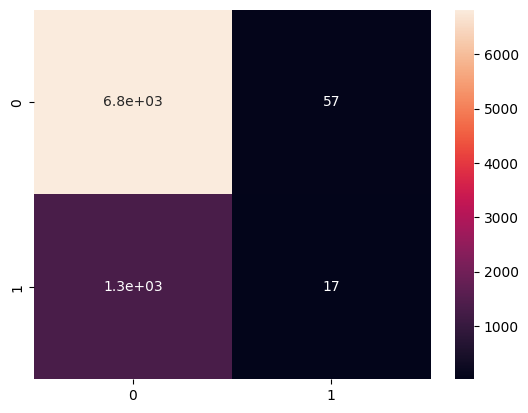

In [419]:
sns.heatmap(cm, annot=True)

In [420]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      6876
           1       0.23      0.01      0.02      1358

    accuracy                           0.83      8234
   macro avg       0.53      0.50      0.47      8234
weighted avg       0.74      0.83      0.76      8234

